<font size=7>LFP Animations

<font color="red">

**To Do**
* line up channels

# <font color="purple"> Ash Code

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import cm
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D
import scipy.interpolate
from matplotlib.widgets import RadioButtons, Slider, Cursor



## <font color="purple"> 3D Animation

In [3]:


class AnimatedTriSurf3D(object):
    def __init__(self,data,x,y,zmin=-2000, zmax=0, frames=100, fps = 20,elev=-30,azim=-90):
        self.fig = plt.figure()
        self.data = data
        self.x = x
        self.y = y

        self.elev = elev
        self.azim = azim

        self.ax = self.fig.add_subplot(111, projection='3d')

        self.title = self.ax.set_title('Amplitudes')
        self.fps = fps
        
        self.zmin = zmin
        self.zmax = zmax
        print(zmin,zmax)
        # make colorbar
        self.norm = norm=plt.Normalize(vmin=self.zmin, vmax=self.zmax)
        self.cbar = self.fig.colorbar(cm.ScalarMappable(norm=self.norm, cmap=cm.coolwarm), ax=self.ax, shrink=0.5, aspect=5)
        self.cbar.set_label('Amplitude (uV)')
        self.cmapper = cm.ScalarMappable(cmap=cm.coolwarm, norm=plt.Normalize(vmin=self.zmin, vmax=self.zmax))
        self.ani = FuncAnimation(self.fig, self.update, frames=frames,interval=1, 
                                          init_func=self.setup_plot, blit=False)
                        
        
        # self.setup_plot()
        # plt.show()
        

    def setup_plot(self):
        # self.scat = self.ax.scatter(self.x,self.y,self.data[:,0])#,c=[data[:,0]],cmap=cm.coolwarm, vmin=zmin, vmax=zmax)
        
        self.surf = self.ax.plot_trisurf(self.x, self.y, self.data[:,0], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
        self.ax.set_zlim(self.zmin, self.zmax)
        self.ax.zaxis.set_major_formatter('{x:.02f}')
        # Set roll, azimuth
        # self.ax.view_init(elev=-90,azim = -90)
        self.ax.view_init(elev=self.elev,azim = self.azim)
        

        # self.ax.set_xlabel('test')
        

    def update(self,i):
        
        self.ax.clear()
        colors = self.cmapper.to_rgba(self.data[:,i])
        # ax.scatter(x, y, data[:,0],c=data[:,0], cmap=cm.coolwarm, vmin=zmin, vmax=zmax)
        # self.scat._offsets3d = (self.x,self.y,self.data[:,i])
        # self.scat._facecolors = colors
        self.surf = self.ax.plot_trisurf(self.x, self.y, self.data[:,i], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, norm = self.norm, edgecolor = 'black')

        self.ax.set_zlim(self.zmin, self.zmax)
        self.ax.set_title(f"{i/20:0.2f}ms")
        self.ax.set_xlabel('um')
        self.ax.set_ylabel('um')

    def save(self, filename):
        '''Saves file'''
        self.ani.save(filename, fps = self.fps)






## <font color="purple">2D Scatter

In [80]:



class AnimatedScatter2D(object):
    def __init__(self,data,x,y,zmin=-2000, zmax=0, frames=100):
        # self.fig = plt.figure()
        # self.ax = self.fig.add_subplot(111)

        self.fig, self.ax = plt.subplots(1,1)
        self.data = data
        self.x = x
        self.y = y
        self.cursor = Cursor(self.ax, useblit=True, color='red')
        # self.radio = RadioButtons(self.ax, ('hello','world'))

        # self.ax_slider = fig.add_axes([0.25, 0.1, 0.65, 0.03])
        # self.slider = Slider(
        #             ax=self.ax_slider,
        #             label="Frame",
        #             valmin=0,
        #             valmax=self.data.shape[1],
        #             valinit=0,
        #             orientation="horizontal"
        #         )

        

        self.title = self.ax.set_title('Amplitudes')
        
        self.zmin = zmin
        self.zmax = zmax
        print(zmin,zmax)
        # make colorbar
        self.norm = norm=plt.Normalize(vmin=self.zmin, vmax=self.zmax)
        self.fig.colorbar(cm.ScalarMappable(norm=self.norm, cmap=cm.coolwarm), ax=self.ax, shrink=0.5, aspect=5)
        self.cmapper = cm.ScalarMappable(cmap=cm.coolwarm, norm=plt.Normalize(vmin=self.zmin, vmax=self.zmax))
        self.ani = FuncAnimation(self.fig, self.update, frames=frames,interval=1000, 
                                          init_func=self.setup_plot, blit=False)
                        
        
        # self.setup_plot()
        # plt.show()
        

    def setup_plot(self):
        # self.scat = self.ax.scatter(self.x,self.y,self.data[:,0])#,c=[data[:,0]],cmap=cm.coolwarm, vmin=zmin, vmax=zmax)
        
        self.scat = self.ax.scatter(self.x, self.y, norm= self.norm, c=self.data[:,0], cmap=cm.coolwarm)#,
                    #    antialiased=False)
        
        # for i, txt in enumerate(range(self.data.shape[0])):
        #     self.ax.annotate(txt, (self.x[i], self.y[i]))

        return self.scat
        

        # self.ax.set_xlabel('test')
        

    def update(self,i):
        
        # self.ax.clear()
        # colors = self.cmapper.to_rgba(self.data[:,i])
        # ax.scatter(x, y, data[:,0],c=data[:,0], cmap=cm.coolwarm, vmin=zmin, vmax=zmax)
        # self.scat._offsets3d = (self.x,self.y,self.data[:,i])
        # self.scat._facecolors = colors
        # collections = self.scat.coll
        # self.scat.set_facecolor(colors)
        self.scat.set_array(self.data[:,i])
        self.ax.set_title(f"{i/20:0.2f}ms")



    def save(self, filename):
        '''Saves file'''
        self.ani.save(filename)



# a = AnimatedTriSurf3D(zmin=-15, zmax = 15)
# plt.show()

## Rewrite Ash's Code

In [ ]:
# class AnimatedScatter2D(object):
#     def __init__(self,data,x,y,zmin=-2000, zmax=0, frames=100):
#         self.fig, self.ax = plt.subplots(1,1)
#         self.data = data
#         self.x = x
#         self.y = y
#         self.cursor = Cursor(self.ax, useblit=True, color='red')
#         self.title = self.ax.set_title('Amplitudes')
        
#         self.zmin = zmin
#         self.zmax = zmax
#         print(zmin,zmax)
#         # make colorbar
#         self.norm = norm=plt.Normalize(vmin=self.zmin, vmax=self.zmax)
#         self.fig.colorbar(cm.ScalarMappable(norm=self.norm, cmap=cm.coolwarm), ax=self.ax, shrink=0.5, aspect=5)
#         self.cmapper = cm.ScalarMappable(cmap=cm.coolwarm, norm=plt.Normalize(vmin=self.zmin, vmax=self.zmax))
#         self.ani = FuncAnimation(self.fig, self.update, frames=frames,interval=1, 
#                                           init_func=self.setup_plot, blit=False)
        

#     def setup_plot(self):
#         self.scat = self.ax.scatter(self.x, self.y, norm= self.norm, c=self.data[:,0], cmap=cm.coolwarm)#,
#         return self.scat

        

#     def update(self,i):
#         self.scat.set_array(self.data[:,i])
#         self.ax.set_title(f"{i/20:0.2f}ms")


#     def save(self, filename):
#         '''Saves file'''
#         self.ani.save(filename)


# <font color="magenta">Bicucculine Animation

## create data for animation function
// ## <font color="grey">Create initial scatterplot - no animation

load in data

In [11]:
import pickle
import braingeneers.data.datasets_electrophysiology as ephys

In [9]:
file = open('/workspaces/human_hippocampus/data/ephys_raw/2022-11-02-e-Hc11.1-chip16753/D_start5s_stop15s_fs1ms.pkl', 'rb')
raw_data = pickle.load(file)
file.close()
raw_data.shape

(1024, 10000)

In [19]:
raw_data.shape

(1024, 10000)

load in data mapping

In [12]:
metadata = ephys.load_metadata("2022-11-02-e-Hc11.1-chip16753")

In [14]:
channel_map = metadata['ephys_experiments']['experiment2']["mapping"]
channel_map = np.array(channel_map)

In [16]:
x = channel_map[:,1]
y = channel_map[:,2]

get data only from channels tha are in the channel mapping

In [76]:
used_data= raw_data[ channel_map[:,0].astype(int) , 5:25 ] # get all channels described in metadata, then pulls raw data for these channels

In [62]:
used_data.shape

(995, 20)

creat scatterplot

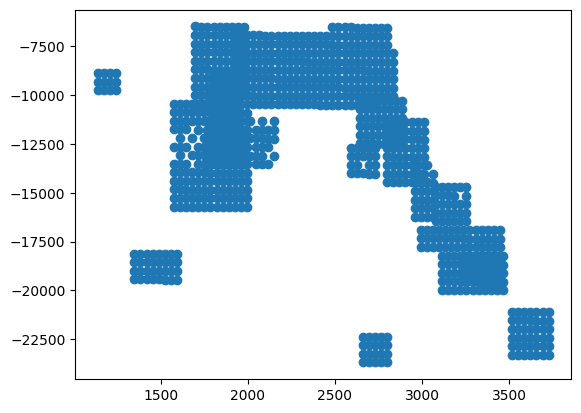

In [17]:
plt.scatter(channel_map[:,2],channel_map[:,1]* -1)

## <font color="magenta"> Create animation

In [67]:
np.min(used_data)

252.83913

In [68]:
np.max(used_data)

726.261

253 727


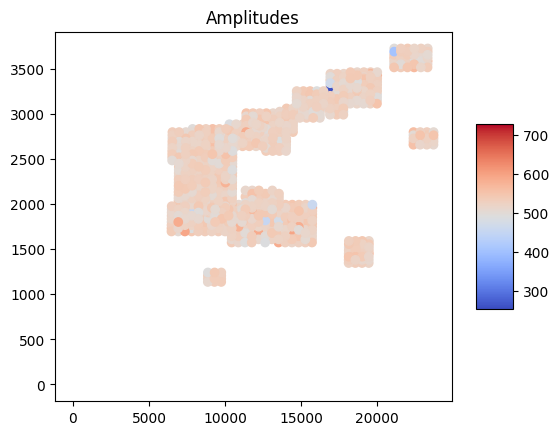

In [77]:
my_anime = AnimatedScatter2D( used_data, x, y, zmin=253, zmax=727, frames=20)

In [81]:
my_anime.save('checkit.mp4')

<font color="brown"> Tried making video in browser

In [78]:
from IPython.display import HTML

In [79]:
HTML( my_anime.ani.to_html5_video() )